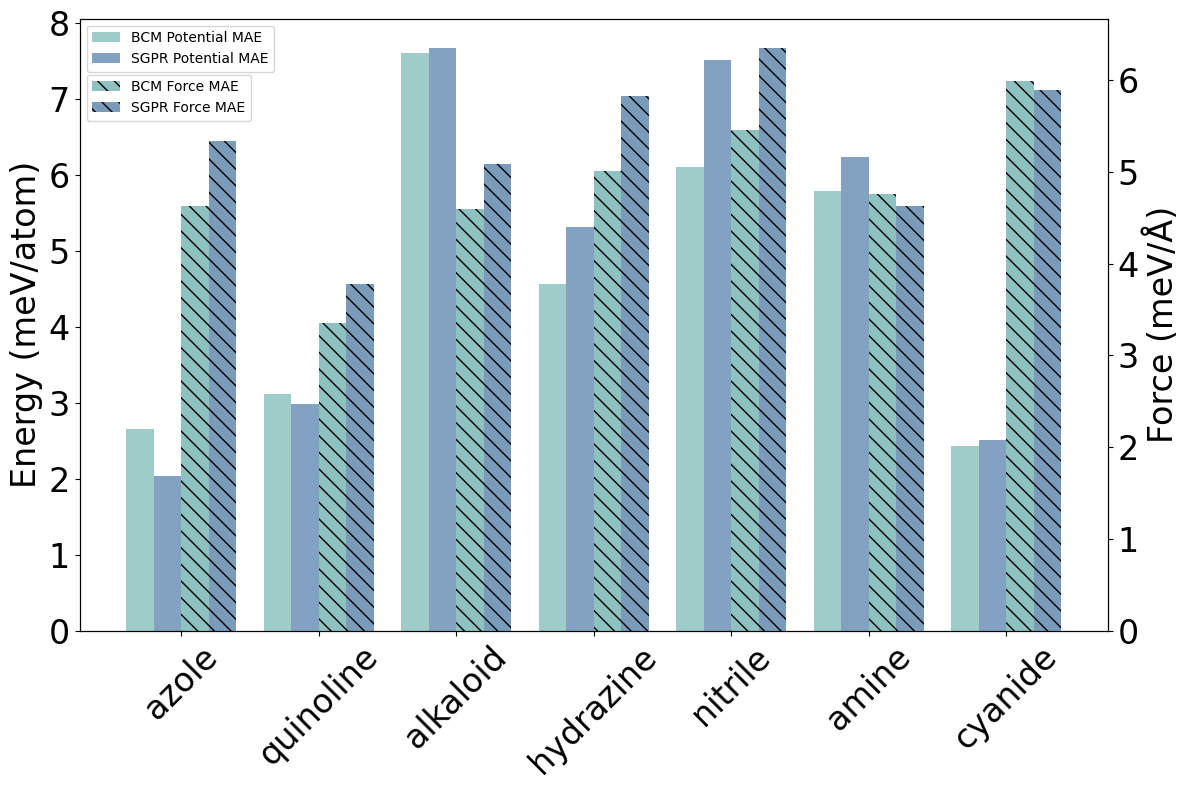

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np


current_dir = '../Data/Fig.3/'  


subdirectories = [name for name in os.listdir(current_dir) if os.path.isdir(os.path.join(current_dir, name))]


force_mae_values_BCM = []
potential_mae_values_BCM = []
force_mae_values = []
potential_mae_values = []
folder_names = []

for subdir in subdirectories:
    file_path_BCM = os.path.join(current_dir, subdir, 'total_mae_BCM.txt')
    file_path = os.path.join(current_dir, subdir, 'total_mae_SGPR.txt')
    
    if os.path.exists(file_path_BCM) and os.path.exists(file_path):
        with open(file_path_BCM, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith('total_force_mae'):
                    total_force_mae_BCM = float(line.split(':')[1].strip().split()[0])
                elif line.startswith('total_potential_mae'):
                    total_potential_mae_BCM = float(line.split(':')[1].strip().split()[0])
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith('total_force_mae'):
                    total_force_mae = float(line.split(':')[1].strip().split()[0])
                elif line.startswith('total_potential_mae'):
                    total_potential_mae = float(line.split(':')[1].strip().split()[0])

        force_mae_values_BCM.append(total_force_mae_BCM)
        potential_mae_values_BCM.append(total_potential_mae_BCM)
        force_mae_values.append(total_force_mae)
        potential_mae_values.append(total_potential_mae)
        folder_names.append(subdir)

bar_width = 0.2
index = np.arange(len(folder_names))

fig, ax1 = plt.subplots(figsize=(12, 8))


bcm_potential_color = '#76b7b2'
bcm_force_color = '#5da8a6'

sgpr_potential_color = '#4e79a7'
sgpr_force_color = '#43719f'

hatch_style = '\\\\'

ax1.bar(index - bar_width, np.array(potential_mae_values_BCM) * 1000, bar_width, alpha=0.7, label='BCM Potential MAE', color=bcm_potential_color)
ax1.bar(index, np.array(potential_mae_values) * 1000, bar_width, alpha=0.7, label='SGPR Potential MAE', color=sgpr_potential_color)
ax1.set_ylabel('Energy (meV/atom)', color='black', fontsize=24) 
ax1.tick_params(axis='y', labelcolor='black', labelsize=24)


ax2 = ax1.twinx()
ax2.bar(index + bar_width, np.array(force_mae_values_BCM) * 1000, bar_width, alpha=0.7, label='BCM Force MAE', color=bcm_force_color, hatch=hatch_style)
ax2.bar(index + 2 * bar_width, np.array(force_mae_values) * 1000, bar_width, alpha=0.7, label='SGPR Force MAE', color=sgpr_force_color, hatch=hatch_style)
ax2.set_ylabel('Force (meV/Å)', color='black', fontsize=24) 
ax2.tick_params(axis='y', labelcolor='black', labelsize=24) 


ax1.set_xticks(index + bar_width/2)
ax1.set_xticklabels(folder_names, rotation=45, fontsize=24, color='black')
plt.xlabel('Folders', fontsize=24, color='black')

ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.92), fontsize=10)

plt.tight_layout() 


fig.savefig('mae_comparison_graph.png', dpi=300, bbox_inches='tight')
plt.show()
